In [9]:
#install library
!pip install -U gensim

    100% |████████████████████████████████| 24.2MB 46kB/s eta 0:00:011   10% |███▍                            | 2.5MB 14.2MB/s eta 0:00:02�███                        | 6.0MB 6.2MB/s eta 0:00:03
    100% |████████████████████████████████| 51kB 15.1MB/s ta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/6a/d2/01/eba912a84fcac622bd25682b0d82933702f5324559e9e62a69
Successfully built smart-open


In [10]:
# imports
%matplotlib inline

import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import string
import re

from gensim import corpora
from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#from ds_voc.text_processing import TextProcessing

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

In [1]:
#Loading data from blobstorage - Not Working!!
from azure.storage.blob import BlobService
import pandas as pd
import os.path
import csv

url = "https://incidentdata.blob.core.windows.net/nqcontainer/incident_data.csv"


STORAGEACCOUNTNAME= 'incidentdata'
STORAGEACCOUNTKEY= "n2MqG+6icTVlNzN3Pai12FVrdK0bxnxaafHrCJpMl1cTYQ2/XCFqJ3zrv2yH3+yEYbvuAr16aOJqa/D6zRceOQ=="
LOCALFILENAME= './file/'        
CONTAINERNAME = 'nqcontainer'
BLOBNAME = 'incident_data.csv'

blob_service = BlobService(account_name=STORAGEACCOUNTNAME, account_key=STORAGEACCOUNTKEY)

# Only get a local copy if haven't already got it
if not os.path.isfile(LOCALFILENAME):
    blob_service.get_blob_to_path(CONTAINERNAME,BLOBNAME,LOCALFILENAME)

df_customer = pd.read_csv(LOCALFILENAME, sep='\t')

NameError: name 'BlobService' is not defined

# Load Data

In [1]:
file = 'incident_data.csv'
import pandas as pd

with open(file,'r', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)
print(df.shape)
    
df.head(5)

(79807, 11)


,number,state,sys_created_on,assigned_to,cmdb_ci,u_ci_name,u_ci_not_found,caller_id,caller_id.location,short_description,description
0,NaN,Closed,07-06-2018 22:28:07,Mark Temple,NaN,NaN,False,Guest,GLOBAL,Sharing calendar(s) cannot be completed,When customer tries to share the calendars Tra...
1,INC0673124,Closed,13-03-2018 10:04:25,Massimo Pedrazzoli,Word 2010,NaN,False,Raman Kamboh,LONDON,The application is not working properly.,The application is not working properly.\n\n
2,INC0673126,Closed,13-03-2018 10:08:26,NaN,Carpe Diem,NaN,False,Hai Ha,HO CHI MINH CITY,0122905-0000001 not found on Carpe Diem when t...,Thuy Do emailed the service desk to advise the...
3,INC0673127,Closed,13-03-2018 10:04:58,NaN,NaN,datrix training,True,Joshua Coupe,NaN,Spend Your Remaining Budget with Datrix Training,Spend Your Remaining Budget with Datrix Training
4,INC0673128,Closed,13-03-2018 10:51:33,NaN,NaN,LNLP1843,True,Claire Toumieux,PARIS,user need wirless_client access for today,user need wirless_client access for today


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79807 entries, 0 to 79806
Data columns (total 11 columns):
number                79806 non-null object
state                 79807 non-null object
sys_created_on        79807 non-null object
assigned_to           66402 non-null object
cmdb_ci               68668 non-null object
u_ci_name             4249 non-null object
u_ci_not_found        79807 non-null bool
caller_id             79806 non-null object
caller_id.location    79258 non-null object
short_description     79806 non-null object
description           79800 non-null object
dtypes: bool(1), object(10)
memory usage: 6.2+ MB


In [4]:
# grab review text
raw = list(df[0:10000]['short_description'])
print(len(raw))
#print(raw)

10000


# Build Model 

In [6]:
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import nltk
nltk.download('stopwords')



from nltk.stem.porter import *
table = str.maketrans({key: None for key in string.punctuation})
#new_s = s.translate(table)

def default_clean(inputString):
    return inputString.translate(table).lower()



stemmer = PorterStemmer() # from nltk.stem.porter 
stop_words = set(stopwords.words('english')) 

def stop_and_stem(inputString): 
    tokenized = [w for w in nltk.word_tokenize(inputString) if w not in stop_words]
    return [stemmer.stem(w) for w in tokenized]

#usual cleaning steps: removing bad characters, stop words, and stemming:
import nltk
nltk.download('punkt')
cleaned = [default_clean(d) for d in raw]
sentences = [stop_and_stem(c) for c in cleaned]

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
#build the model
from gensim.models import Word2Vec
model = Word2Vec(sentences=sentences, # tokenized senteces, list of list of strings
                 size=300,  # size of embedding vectors
                 workers=4, # how many threads?
                 min_count=5, # minimum frequency per token, filtering rare words
                 sample=0.05, # weight of downsampling common words
                 sg = 0, # should we use skip-gram? if 0, then cbow
                 iter=5,
                 hs = 0)



X = model[model.wv.vocab]
vocabulary = [model.wv.vocab]
print(vocabulary)



[{'share': <gensim.models.keyedvectors.Vocab object at 0x7faca7f536a0>, 'calendar': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53908>, 'complet': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53048>, 'applic': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53780>, 'work': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53470>, 'properli': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53240>, 'found': <gensim.models.keyedvectors.Vocab object at 0x7faca7f537f0>, 'carp': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53630>, 'diem': <gensim.models.keyedvectors.Vocab object at 0x7faca7f534e0>, 'tri': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53588>, 'close': <gensim.models.keyedvectors.Vocab object at 0x7faca7f530f0>, 'timesheet': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53390>, 'remain': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53400>, 'train': <gensim.models.keyedvectors.Vocab object at 0x7faca7f53748>, 'user': <

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [32]:
#Improved Model Opetion1: We can also improve the word embeddings by adding bigrams and/or part-of-speech tags into the model. Part-of-speech tagging can be useful in situations where the same word may have multiple meanings. For example, seasoning can be both a noun and a verb and has different meanings depending on the part of speech.
import nltk
nltk.download('averaged_perceptron_tagger')
sent_w_pos = [nltk.pos_tag(d) for d in sentences]
sents = [[tup[0]+tup[1] for tup in d] for d in sent_w_pos]

model_pos = Word2Vec(sentences=sents,
                 size=300,
                 workers=4,
                 min_count=2,
                 sample=0.05,
                 sg = 0,
                 hs=0,
                iter=5
            )

X = model_pos[model_pos.wv.vocab]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nbuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Improved Model Opetion2: We can also add bigrams to our model to allow for frequent word pairs to be grouped:

In [53]:
bigrams = Phrases(sentences)
model = Word2Vec(sentences=bigrams[sentences],
                 size=300,
                 workers=4,
                 min_count=2,
                 sample=0.05,
                 sg = 0,
                 iter=5,
                 hs = 0
        )

X = model[model.wv.vocab]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


# Test Model

Start with a simple exmaple by checking what kind of terms the model considers similar to "word":

In [56]:
print(model.wv.most_similar('report'))

#print(model.wv.most_similar('Google'))

[('got', 0.990428626537323), ('reachabl', 0.9897840023040771), ('29032018', 0.9878631830215454), ('emailblacklist', 0.9873203039169312), ('need_help', 0.9868890047073364), ('email_extern', 0.9857465624809265), ('look', 0.9852635264396667), ('host', 0.9833909273147583), ('voipphon', 0.9833568930625916), ('queri_regard', 0.9816524982452393)]


In [58]:
v1 = Word2Vec.wv['report']  
v1

AttributeError: type object 'Word2Vec' has no attribute 'wv'

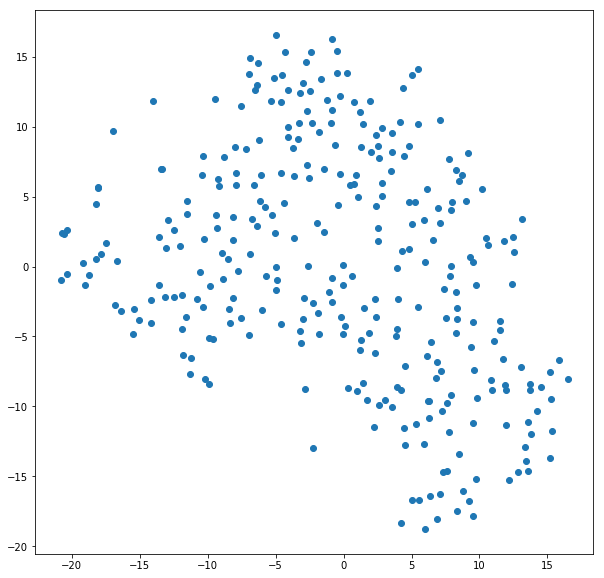

In [43]:
# visualize food data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [44]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet

def interactive_tsne(text_labels, tsne_array):
    '''makes an interactive scatter plot with text labels for each point'''

    # define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y'])
    bokeh_df['text_labels'] = bokeh_df.index

    # interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select"

    p = figure(tools=TOOLS, plot_width=700, plot_height=700)

    # define data source for the plot
    source = ColumnDataSource(bokeh_df)

    # scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6,
              fill_color="#8724B5",
              line_color=None)

    # text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8,
                      text_font_size="8pt", text_color="#555555",
                      source=source, text_align='center')

    p.add_layout(labels)

    # show plot inline
    output_notebook()
    show(p)
    
    

In [45]:
interactive_tsne(model.wv.vocab.keys(), X_tsne) # output to see in the notebook 

Loading BokehJS ...